# Data Exploration & Data Merge

In [ ]:
import csv
import os

def combine_csv_files_from_folder(folder_path, output_file, has_header=True):
    """
    Combines all CSV files in a folder into a single CSV file.

    Parameters:
    - folder_path (str): Path to the folder containing the input CSV files.
    - output_file (str): Path to the output CSV file.
    - has_header (bool): If True, assumes the first row of each file is a header and skips
                         headers in all but the first file. If False, combines all rows
                         from all files without skipping any.
    """
    # Get a list of all CSV files in the folder
    file_list = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

    with open(output_file, 'w', newline='') as outfile:
        writer = csv.writer(outfile)

        for i, file in enumerate(file_list):
            with open(file, 'r') as infile:
                reader = csv.reader(infile)

                # Skip the header row for subsequent files if has_header is True
                if has_header and i > 0:
                    next(reader, None)

                # Write all remaining rows
                for row in reader:
                    writer.writerow(row)

# Example usage
if __name__ == "__main__":
    # Folder containing CSV files to combine
    folder = '/content/drive/My Drive/smai_project/wc_cleaned_data' # Assuming this is the correct path.  Or try `/content/drive/Shared drives/<shared_drive_name>/smai_project/wc_cleaned_data`

    # Output file
    output = '/content/drive/My Drive/smai_project/combined.csv'

    # Combine the files, assuming they have headers
    combine_csv_files_from_folder(folder, output, has_header=True)

    # Download the combined CSV file
    files.download(output)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
output= '/content/combined.csv'

In [ ]:
import pandas as pd

# Assuming 'combined.csv' is in your Google Drive
file_path = '/content/combined.csv'

df = pd.read_csv(file_path)

columns = df.columns.tolist()
print(columns)
print(df.head)

['Unnamed: 0', 'inning', 'batting_team', 'bowling_team', 'batsman', 'bowler', 'batsman_name', 'non_striker', 'bowler_name', 'bat_right_handed', 'ovr', 'runs_batter', 'runs_w_extras', 'extras', 'x', 'y', 'z', 'landing_x', 'landing_y', 'ended_x', 'ended_y', 'ball_speed', 'cumul_runs', 'wicket', 'wicket_method', 'who_out', 'control', 'extras_type']
<bound method NDFrame.head of        Unnamed: 0  inning batting_team bowling_team  batsman  bowler  \
0               0       1     Scotland    Australia    25446  311592   
1               1       1     Scotland    Australia    25446  311592   
2               2       1     Scotland    Australia    25446  311592   
3               3       1     Scotland    Australia    25446  311592   
4               4       1     Scotland    Australia    25446  311592   
...           ...     ...          ...          ...      ...     ...   
25717         600       2        India     Zimbabwe    33335  425639   
25718         601       2        India     Zim

# Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Define bowling styles for bowlers
bowler_styles = {
    'Nuwan Kulasekara': 'Fast', 'Lasith Malinga': 'Fast', 'Angelo Mathews': 'Medium', 'Rangana Herath': 'Spin',
    'Tillakaratne Dilshan': 'Spin', 'Suranga Lakmal': 'Fast', 'Jeevan Mendis': 'Spin', 'Tim Southee': 'Fast',
    'Trent Boult': 'Fast', 'Adam Milne': 'Fast', 'Daniel Vettori': 'Spin', 'Grant Elliott': 'Medium',
    'Kane Williamson': 'Spin', 'Corey Anderson': 'Fast', 'James Anderson': 'Fast', 'Stuart Broad': 'Fast',
    'Chris Woakes': 'Fast', 'Steven Finn': 'Fast', 'Moeen Ali': 'Spin', 'Joe Root': 'Spin', 'Mitchell Starc': 'Fast',
    'Josh Hazlewood': 'Fast', 'Mitchell Johnson': 'Fast', 'Mitchell Marsh': 'Fast', 'Shane Watson': 'Fast',
    'Glenn Maxwell': 'Spin', 'Steven Smith': 'Spin', 'Tinashe Panyangara': 'Fast', 'Tendai Chatara': 'Fast',
    'Solomon Mire': 'Medium', 'Elton Chigumbura': 'Medium', 'Sean Williams': 'Spin', 'Tafadzwa Kamungozi': 'Spin',
    'Sikandar Raza': 'Spin', 'Hamilton Masakadza': 'Medium', 'Vernon Philander': 'Fast', 'Morne Morkel': 'Fast',
    'Dale Steyn': 'Fast', 'Farhaan Behardien': 'Medium', 'Jean-Paul Duminy': 'Spin', 'Imran Tahir': 'Spin',
    'Mohammad Irfan': 'Fast', 'Sohail Khan': 'Fast', 'Shahid Afridi': 'Spin', 'Wahab Riaz': 'Fast',
    'Yasir Shah': 'Spin', 'Haris Sohail': 'Spin', 'Umesh Yadav': 'Fast', 'Mohammed Shami': 'Fast',
    'Mohit Sharma': 'Fast', 'Suresh Raina': 'Spin', 'Ravichandran Ashwin': 'Spin', 'Ravindra Jadeja': 'Spin',
    'John Mooney': 'Medium', 'Max Sorensen': 'Fast', 'Andy McBrine': 'Spin', 'Kevin O\'Brien': 'Medium',
    'George Dockrell': 'Spin', 'Paul Stirling': 'Spin', 'Jason Holder': 'Fast', 'Kemar Roach': 'Fast',
    'Jerome Taylor': 'Fast', 'Andre Russell': 'Fast', 'Chris Gayle': 'Spin', 'Darren Sammy': 'Medium',
    'Marlon Samuels': 'Spin', 'Lendl Simmons': 'Medium', 'Iain Wardlaw': 'Fast', 'Rob Taylor': 'Medium',
    'Josh Davey': 'Fast', 'Majid Haq': 'Spin', 'Hamid Hassan': 'Fast', 'Shapoor Zadran': 'Fast',
    'Aftab Alam': 'Fast', 'Mirwais Ashraf': 'Medium', 'Mohammad Nabi': 'Spin', 'Javed Ahmadi': 'Spin',
    'Samiullah Shenwari': 'Spin', 'Mashrafe Mortaza': 'Fast', 'Rubel Hossain': 'Fast', 'Taskin Ahmed': 'Fast',
    'Shakib Al Hasan': 'Spin', 'Mahmudullah': 'Spin', 'Soumya Sarkar': 'Medium', 'Sabbir Rahman': 'Spin',
    'Mohammad Naveed': 'Fast', 'Amjad Javed': 'Medium', 'Nasir Aziz': 'Spin', 'Mohammad Tauqir': 'Spin',
    'Krishna Chandran': 'Medium', 'Rohan Mustafa': 'Spin', 'Sohaib Maqsood': 'Medium', 'Sulieman Benn': 'Spin',
    'Thisara Perera': 'Fast', 'Dawlat Zadran': 'Fast', 'Asghar Stanikzai': 'Medium', 'Wayne Parnell': 'Fast',
    'Alasdair Evans': 'Fast', 'Richie Berrington': 'Medium', 'Matt Machan': 'Spin', 'Kyle Coetzer': 'Medium',
    'Nikita Miller': 'Spin', 'Alex Cusack': 'Medium', 'Manjula Guruge': 'Fast', 'Gulbadin Naib': 'Medium',
    'Kyle Abbott': 'Fast', 'Faf du Plessis': 'Spin', 'Pat Cummins': 'Fast', 'Bhuvneshwar Kumar': 'Fast',
    'Tawanda Mupariwa': 'Medium', 'Rahat Ali': 'Fast', 'Rilee Rossouw': 'Medium', 'AB de Villiers': 'Medium',
    'Khurram Khan': 'Spin', 'Nawroz Mangal': 'Spin', 'Michael Clarke': 'Spin', 'James Faulkner': 'Fast',
    'Nasir Hossain': 'Spin', 'Dwayne Smith': 'Medium', 'Sachithra Senanayake': 'Spin', 'Seekkuge Prasanna': 'Spin',
    'Xavier Doherty': 'Spin', 'Chris Jordan': 'Fast', 'Arafat Sunny': 'Spin', 'Rohit Sharma': 'Spin',
    'Stuart Thompson': 'Medium', 'Michael Leask': 'Spin', 'Dushmantha Chameera': 'Fast', 'Kamran Shazad': 'Fast',
    'Fahad Alhashmi': 'Fast', 'Shaiman Anwar': 'Medium', 'Mitigation McClenaghan': 'Fast', 'Taijul Islam': 'Spin',
    'Ravi Bopara': 'Medium', 'James Tredwell': 'Spin', 'Ehsan Adil': 'Fast', 'Tharindu Kaushal': 'Spin',
    'Matt Henry': 'Fast', 'Virat Kohli': 'Medium'
}

# Load dataset
df = pd.read_csv('combined.csv')  # Replace with actual dataset path

df['bowler_type'] = df['bowler_name'].map(bowler_styles)

# Handle missing values
num_cols = ['landing_x', 'landing_y', 'ended_x', 'ended_y', 'ball_speed', 'ovr']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)
df['bowler_type'].fillna('Unknown', inplace=True)

# Compute is_deceptive using EWMA
alpha = 0.2
for f in ['landing_x', 'landing_y', 'ended_x', 'ended_y', 'ball_speed']:
    df[f'{f}_ewma'] = df.groupby('bowler_type')[f].transform(lambda x: x.ewm(alpha=alpha, adjust=False).mean())
    deviation = df[f] - df[f'{f}_ewma']
    std_dev = df.groupby('bowler_type')[f'{f}_ewma'].transform('std')
    df[f'{f}_is_deceptive'] = (deviation.abs() > 2 * std_dev).astype(int)
df['is_deceptive'] = df[[f'{f}_is_deceptive' for f in ['landing_x', 'landing_y', 'ended_x', 'ended_y', 'ball_speed']]].max(axis=1)

# Encode categorical features
le = LabelEncoder()
df['bowler_type_encoded'] = le.fit_transform(df['bowler_type'])
joblib.dump(le, "label_encoder.pkl")

# Match ID for sequence grouping
df['match_id'] = df.groupby(['batting_team', 'bowling_team', 'inning']).ngroup()
df = df.sort_values(['match_id', 'ovr'])
features = ['landing_x', 'landing_y', 'ended_x', 'ended_y', 'ball_speed', 'bowler_type_encoded', 'ovr']

for seq_len in [1, 2, 3, 4, 5]:
    print(f"\n🔁 Training model for sequence length: {seq_len}")
    sequences, labels = [], []

    for mid in df['match_id'].unique():
        mdf = df[df['match_id'] == mid]
        for bt in mdf['bowler_type'].unique():
            bdf = mdf[mdf['bowler_type'] == bt]
            for i in range(seq_len, len(bdf)):
                seq = bdf.iloc[i - seq_len:i][features].values
                label = bdf.iloc[i]['is_deceptive']
                sequences.append(seq)
                labels.append(label)

    sequences = np.array(sequences, dtype=np.float32)
    labels = np.array(labels, dtype=np.int32)

    # Train-test split
    X_train_seq, X_test_seq, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42)

    # Scaling
    scaler = StandardScaler()
    for i in [0, 1, 2, 3, 4, 6]:
        X_train_seq[:, :, i] = scaler.fit_transform(X_train_seq[:, :, i].reshape(-1, 1)).reshape(X_train_seq.shape[0], X_train_seq.shape[1])
        X_test_seq[:, :, i] = scaler.transform(X_test_seq[:, :, i].reshape(-1, 1)).reshape(X_test_seq.shape[0], X_test_seq.shape[1])

    # Flatten
    X_train = X_train_seq.reshape(X_train_seq.shape[0], -1)
    X_test = X_test_seq.reshape(X_test_seq.shape[0], -1)

    # Train
    model = LogisticRegression(max_iter=1000, class_weight='balanced')
    model.fit(X_train, y_train)

    # Save artifacts
    joblib.dump(model, f"logistic_regression_seq{seq_len}.pkl")
    joblib.dump(scaler, f"scaler_seq{seq_len}.pkl")
    joblib.dump((X_train, y_train), f"ml_train_seq{seq_len}.pkl")
    joblib.dump((X_test, y_test), f"ml_test_seq{seq_len}.pkl")
    print(f"✅ Saved model, scaler, and data for seq_len={seq_len}")

<ipython-input-18-30c86902eb03>:61: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-18-30c86902eb03>:62: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin


🔁 Training model for sequence length: 1
✅ Saved model, scaler, and data for seq_len=1

🔁 Training model for sequence length: 2
✅ Saved model, scaler, and data for seq_len=2

🔁 Training model for sequence length: 3
✅ Saved model, scaler, and data for seq_len=3

🔁 Training model for sequence length: 4
✅ Saved model, scaler, and data for seq_len=4

🔁 Training model for sequence length: 5
✅ Saved model, scaler, and data for seq_len=5


# Random Forest

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Define bowling styles for bowlers
bowler_styles = {
    'Nuwan Kulasekara': 'Fast', 'Lasith Malinga': 'Fast', 'Angelo Mathews': 'Medium', 'Rangana Herath': 'Spin',
    'Tillakaratne Dilshan': 'Spin', 'Suranga Lakmal': 'Fast', 'Jeevan Mendis': 'Spin', 'Tim Southee': 'Fast',
    'Trent Boult': 'Fast', 'Adam Milne': 'Fast', 'Daniel Vettori': 'Spin', 'Grant Elliott': 'Medium',
    'Kane Williamson': 'Spin', 'Corey Anderson': 'Fast', 'James Anderson': 'Fast', 'Stuart Broad': 'Fast',
    'Chris Woakes': 'Fast', 'Steven Finn': 'Fast', 'Moeen Ali': 'Spin', 'Joe Root': 'Spin', 'Mitchell Starc': 'Fast',
    'Josh Hazlewood': 'Fast', 'Mitchell Johnson': 'Fast', 'Mitchell Marsh': 'Fast', 'Shane Watson': 'Fast',
    'Glenn Maxwell': 'Spin', 'Steven Smith': 'Spin', 'Tinashe Panyangara': 'Fast', 'Tendai Chatara': 'Fast',
    'Solomon Mire': 'Medium', 'Elton Chigumbura': 'Medium', 'Sean Williams': 'Spin', 'Tafadzwa Kamungozi': 'Spin',
    'Sikandar Raza': 'Spin', 'Hamilton Masakadza': 'Medium', 'Vernon Philander': 'Fast', 'Morne Morkel': 'Fast',
    'Dale Steyn': 'Fast', 'Farhaan Behardien': 'Medium', 'Jean-Paul Duminy': 'Spin', 'Imran Tahir': 'Spin',
    'Mohammad Irfan': 'Fast', 'Sohail Khan': 'Fast', 'Shahid Afridi': 'Spin', 'Wahab Riaz': 'Fast',
    'Yasir Shah': 'Spin', 'Haris Sohail': 'Spin', 'Umesh Yadav': 'Fast', 'Mohammed Shami': 'Fast',
    'Mohit Sharma': 'Fast', 'Suresh Raina': 'Spin', 'Ravichandran Ashwin': 'Spin', 'Ravindra Jadeja': 'Spin',
    'John Mooney': 'Medium', 'Max Sorensen': 'Fast', 'Andy McBrine': 'Spin', 'Kevin O\'Brien': 'Medium',
    'George Dockrell': 'Spin', 'Paul Stirling': 'Spin', 'Jason Holder': 'Fast', 'Kemar Roach': 'Fast',
    'Jerome Taylor': 'Fast', 'Andre Russell': 'Fast', 'Chris Gayle': 'Spin', 'Darren Sammy': 'Medium',
    'Marlon Samuels': 'Spin', 'Lendl Simmons': 'Medium', 'Iain Wardlaw': 'Fast', 'Rob Taylor': 'Medium',
    'Josh Davey': 'Fast', 'Majid Haq': 'Spin', 'Hamid Hassan': 'Fast', 'Shapoor Zadran': 'Fast',
    'Aftab Alam': 'Fast', 'Mirwais Ashraf': 'Medium', 'Mohammad Nabi': 'Spin', 'Javed Ahmadi': 'Spin',
    'Samiullah Shenwari': 'Spin', 'Mashrafe Mortaza': 'Fast', 'Rubel Hossain': 'Fast', 'Taskin Ahmed': 'Fast',
    'Shakib Al Hasan': 'Spin', 'Mahmudullah': 'Spin', 'Soumya Sarkar': 'Medium', 'Sabbir Rahman': 'Spin',
    'Mohammad Naveed': 'Fast', 'Amjad Javed': 'Medium', 'Nasir Aziz': 'Spin', 'Mohammad Tauqir': 'Spin',
    'Krishna Chandran': 'Medium', 'Rohan Mustafa': 'Spin', 'Sohaib Maqsood': 'Medium', 'Sulieman Benn': 'Spin',
    'Thisara Perera': 'Fast', 'Dawlat Zadran': 'Fast', 'Asghar Stanikzai': 'Medium', 'Wayne Parnell': 'Fast',
    'Alasdair Evans': 'Fast', 'Richie Berrington': 'Medium', 'Matt Machan': 'Spin', 'Kyle Coetzer': 'Medium',
    'Nikita Miller': 'Spin', 'Alex Cusack': 'Medium', 'Manjula Guruge': 'Fast', 'Gulbadin Naib': 'Medium',
    'Kyle Abbott': 'Fast', 'Faf du Plessis': 'Spin', 'Pat Cummins': 'Fast', 'Bhuvneshwar Kumar': 'Fast',
    'Tawanda Mupariwa': 'Medium', 'Rahat Ali': 'Fast', 'Rilee Rossouw': 'Medium', 'AB de Villiers': 'Medium',
    'Khurram Khan': 'Spin', 'Nawroz Mangal': 'Spin', 'Michael Clarke': 'Spin', 'James Faulkner': 'Fast',
    'Nasir Hossain': 'Spin', 'Dwayne Smith': 'Medium', 'Sachithra Senanayake': 'Spin', 'Seekkuge Prasanna': 'Spin',
    'Xavier Doherty': 'Spin', 'Chris Jordan': 'Fast', 'Arafat Sunny': 'Spin', 'Rohit Sharma': 'Spin',
    'Stuart Thompson': 'Medium', 'Michael Leask': 'Spin', 'Dushmantha Chameera': 'Fast', 'Kamran Shazad': 'Fast',
    'Fahad Alhashmi': 'Fast', 'Shaiman Anwar': 'Medium', 'Mitigation McClenaghan': 'Fast', 'Taijul Islam': 'Spin',
    'Ravi Bopara': 'Medium', 'James Tredwell': 'Spin', 'Ehsan Adil': 'Fast', 'Tharindu Kaushal': 'Spin',
    'Matt Henry': 'Fast', 'Virat Kohli': 'Medium'
}

# Load dataset
df = pd.read_csv('combined.csv')  # Replace with actual dataset path

df['bowler_type'] = df['bowler_name'].map(bowler_styles)

# Handle missing values
num_cols = ['landing_x', 'landing_y', 'ended_x', 'ended_y', 'ball_speed', 'ovr']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)
df['bowler_type'].fillna('Unknown', inplace=True)

# Compute is_deceptive using EWMA
alpha = 0.2
for f in ['landing_x', 'landing_y', 'ended_x', 'ended_y', 'ball_speed']:
    df[f'{f}_ewma'] = df.groupby('bowler_type')[f].transform(lambda x: x.ewm(alpha=alpha, adjust=False).mean())
    deviation = df[f] - df[f'{f}_ewma']
    std_dev = df.groupby('bowler_type')[f'{f}_ewma'].transform('std')
    df[f'{f}_is_deceptive'] = (deviation.abs() > 2 * std_dev).astype(int)
df['is_deceptive'] = df[[f'{f}_is_deceptive' for f in ['landing_x', 'landing_y', 'ended_x', 'ended_y', 'ball_speed']]].max(axis=1)

# Encode categorical features
le = LabelEncoder()
df['bowler_type_encoded'] = le.fit_transform(df['bowler_type'])
joblib.dump(le, "label_encoder.pkl")

# Match ID for sequence grouping
df['match_id'] = df.groupby(['batting_team', 'bowling_team', 'inning']).ngroup()
df = df.sort_values(['match_id', 'ovr'])
features = ['landing_x', 'landing_y', 'ended_x', 'ended_y', 'ball_speed', 'bowler_type_encoded', 'ovr']

for seq_len in [1, 2, 3, 4, 5]:
    print(f"\n🔁 Training model for sequence length: {seq_len}")
    sequences, labels = [], []

    for mid in df['match_id'].unique():
        mdf = df[df['match_id'] == mid]
        for bt in mdf['bowler_type'].unique():
            bdf = mdf[mdf['bowler_type'] == bt]
            for i in range(seq_len, len(bdf)):
                seq = bdf.iloc[i - seq_len:i][features].values
                label = bdf.iloc[i]['is_deceptive']
                sequences.append(seq)
                labels.append(label)

    sequences = np.array(sequences, dtype=np.float32)
    labels = np.array(labels, dtype=np.int32)

    # Train-test split
    X_train_seq, X_test_seq, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42)

    # Scaling
    scaler = StandardScaler()
    for i in [0, 1, 2, 3, 4, 6]:
        X_train_seq[:, :, i] = scaler.fit_transform(X_train_seq[:, :, i].reshape(-1, 1)).reshape(X_train_seq.shape[0], X_train_seq.shape[1])
        X_test_seq[:, :, i] = scaler.transform(X_test_seq[:, :, i].reshape(-1, 1)).reshape(X_test_seq.shape[0], X_test_seq.shape[1])

    # Flatten
    X_train = X_train_seq.reshape(X_train_seq.shape[0], -1)
    X_test = X_test_seq.reshape(X_test_seq.shape[0], -1)

    # Random Forest with GridSearch
    rf_params = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
    rf = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'),
                      rf_params, cv=5, scoring='accuracy', n_jobs=-1)
    rf.fit(X_train, y_train)

    # Evaluate
    y_pred_rf = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred_rf)
    prec = precision_score(y_test, y_pred_rf, zero_division=0)
    rec = recall_score(y_test, y_pred_rf, zero_division=0)
    f1 = f1_score(y_test, y_pred_rf, zero_division=0)

    # Save artifacts
    joblib.dump(rf.best_estimator_, f"random_forest_seq{seq_len}.pkl")
    joblib.dump(scaler, f"scaler_rf_seq{seq_len}.pkl")
    joblib.dump((X_train, y_train), f"ml_train_rf_seq{seq_len}.pkl")
    joblib.dump((X_test, y_test), f"ml_test_rf_seq{seq_len}.pkl")
    print(f"📁 Saved RF model and data for seq_len={seq_len}")

<ipython-input-20-1c3abc26eca7>:62: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-20-1c3abc26eca7>:63: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin


🔁 Training model for sequence length: 1
📁 Saved RF model and data for seq_len=1

🔁 Training model for sequence length: 2
📁 Saved RF model and data for seq_len=2

🔁 Training model for sequence length: 3
📁 Saved RF model and data for seq_len=3

🔁 Training model for sequence length: 4
📁 Saved RF model and data for seq_len=4

🔁 Training model for sequence length: 5
📁 Saved RF model and data for seq_len=5


# LSTM

In [ ]:
output= '/content/combined.csv'
import pandas as pd

# Assuming 'combined.csv' is in your Google Drive
file_path = '/content/combined.csv'

df = pd.read_csv(file_path)

columns = df.columns.tolist()
print(columns)
print(df.head)

['Unnamed: 0', 'inning', 'batting_team', 'bowling_team', 'batsman', 'bowler', 'batsman_name', 'non_striker', 'bowler_name', 'bat_right_handed', 'ovr', 'runs_batter', 'runs_w_extras', 'extras', 'x', 'y', 'z', 'landing_x', 'landing_y', 'ended_x', 'ended_y', 'ball_speed', 'cumul_runs', 'wicket', 'wicket_method', 'who_out', 'control', 'extras_type']
<bound method NDFrame.head of        Unnamed: 0  inning batting_team bowling_team  batsman  bowler  \
0               0       1     Scotland    Australia    25446  311592   
1               1       1     Scotland    Australia    25446  311592   
2               2       1     Scotland    Australia    25446  311592   
3               3       1     Scotland    Australia    25446  311592   
4               4       1     Scotland    Australia    25446  311592   
...           ...     ...          ...          ...      ...     ...   
25717         600       2        India     Zimbabwe    33335  425639   
25718         601       2        India     Zim

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Define bowling styles for bowlers
bowler_styles = {
    'Nuwan Kulasekara': 'Fast', 'Lasith Malinga': 'Fast', 'Angelo Mathews': 'Medium', 'Rangana Herath': 'Spin',
    'Tillakaratne Dilshan': 'Spin', 'Suranga Lakmal': 'Fast', 'Jeevan Mendis': 'Spin', 'Tim Southee': 'Fast',
    'Trent Boult': 'Fast', 'Adam Milne': 'Fast', 'Daniel Vettori': 'Spin', 'Grant Elliott': 'Medium',
    'Kane Williamson': 'Spin', 'Corey Anderson': 'Fast', 'James Anderson': 'Fast', 'Stuart Broad': 'Fast',
    'Chris Woakes': 'Fast', 'Steven Finn': 'Fast', 'Moeen Ali': 'Spin', 'Joe Root': 'Spin', 'Mitchell Starc': 'Fast',
    'Josh Hazlewood': 'Fast', 'Mitchell Johnson': 'Fast', 'Mitchell Marsh': 'Fast', 'Shane Watson': 'Fast',
    'Glenn Maxwell': 'Spin', 'Steven Smith': 'Spin', 'Tinashe Panyangara': 'Fast', 'Tendai Chatara': 'Fast',
    'Solomon Mire': 'Medium', 'Elton Chigumbura': 'Medium', 'Sean Williams': 'Spin', 'Tafadzwa Kamungozi': 'Spin',
    'Sikandar Raza': 'Spin', 'Hamilton Masakadza': 'Medium', 'Vernon Philander': 'Fast', 'Morne Morkel': 'Fast',
    'Dale Steyn': 'Fast', 'Farhaan Behardien': 'Medium', 'Jean-Paul Duminy': 'Spin', 'Imran Tahir': 'Spin',
    'Mohammad Irfan': 'Fast', 'Sohail Khan': 'Fast', 'Shahid Afridi': 'Spin', 'Wahab Riaz': 'Fast',
    'Yasir Shah': 'Spin', 'Haris Sohail': 'Spin', 'Umesh Yadav': 'Fast', 'Mohammed Shami': 'Fast',
    'Mohit Sharma': 'Fast', 'Suresh Raina': 'Spin', 'Ravichandran Ashwin': 'Spin', 'Ravindra Jadeja': 'Spin',
    'John Mooney': 'Medium', 'Max Sorensen': 'Fast', 'Andy McBrine': 'Spin', 'Kevin O\'Brien': 'Medium',
    'George Dockrell': 'Spin', 'Paul Stirling': 'Spin', 'Jason Holder': 'Fast', 'Kemar Roach': 'Fast',
    'Jerome Taylor': 'Fast', 'Andre Russell': 'Fast', 'Chris Gayle': 'Spin', 'Darren Sammy': 'Medium',
    'Marlon Samuels': 'Spin', 'Lendl Simmons': 'Medium', 'Iain Wardlaw': 'Fast', 'Rob Taylor': 'Medium',
    'Josh Davey': 'Fast', 'Majid Haq': 'Spin', 'Hamid Hassan': 'Fast', 'Shapoor Zadran': 'Fast',
    'Aftab Alam': 'Fast', 'Mirwais Ashraf': 'Medium', 'Mohammad Nabi': 'Spin', 'Javed Ahmadi': 'Spin',
    'Samiullah Shenwari': 'Spin', 'Mashrafe Mortaza': 'Fast', 'Rubel Hossain': 'Fast', 'Taskin Ahmed': 'Fast',
    'Shakib Al Hasan': 'Spin', 'Mahmudullah': 'Spin', 'Soumya Sarkar': 'Medium', 'Sabbir Rahman': 'Spin',
    'Mohammad Naveed': 'Fast', 'Amjad Javed': 'Medium', 'Nasir Aziz': 'Spin', 'Mohammad Tauqir': 'Spin',
    'Krishna Chandran': 'Medium', 'Rohan Mustafa': 'Spin', 'Sohaib Maqsood': 'Medium', 'Sulieman Benn': 'Spin',
    'Thisara Perera': 'Fast', 'Dawlat Zadran': 'Fast', 'Asghar Stanikzai': 'Medium', 'Wayne Parnell': 'Fast',
    'Alasdair Evans': 'Fast', 'Richie Berrington': 'Medium', 'Matt Machan': 'Spin', 'Kyle Coetzer': 'Medium',
    'Nikita Miller': 'Spin', 'Alex Cusack': 'Medium', 'Manjula Guruge': 'Fast', 'Gulbadin Naib': 'Medium',
    'Kyle Abbott': 'Fast', 'Faf du Plessis': 'Spin', 'Pat Cummins': 'Fast', 'Bhuvneshwar Kumar': 'Fast',
    'Tawanda Mupariwa': 'Medium', 'Rahat Ali': 'Fast', 'Rilee Rossouw': 'Medium', 'AB de Villiers': 'Medium',
    'Khurram Khan': 'Spin', 'Nawroz Mangal': 'Spin', 'Michael Clarke': 'Spin', 'James Faulkner': 'Fast',
    'Nasir Hossain': 'Spin', 'Dwayne Smith': 'Medium', 'Sachithra Senanayake': 'Spin', 'Seekkuge Prasanna': 'Spin',
    'Xavier Doherty': 'Spin', 'Chris Jordan': 'Fast', 'Arafat Sunny': 'Spin', 'Rohit Sharma': 'Spin',
    'Stuart Thompson': 'Medium', 'Michael Leask': 'Spin', 'Dushmantha Chameera': 'Fast', 'Kamran Shazad': 'Fast',
    'Fahad Alhashmi': 'Fast', 'Shaiman Anwar': 'Medium', 'Mitigation McClenaghan': 'Fast', 'Taijul Islam': 'Spin',
    'Ravi Bopara': 'Medium', 'James Tredwell': 'Spin', 'Ehsan Adil': 'Fast', 'Tharindu Kaushal': 'Spin',
    'Matt Henry': 'Fast', 'Virat Kohli': 'Medium'
}

# Load dataset
df = pd.read_csv('combined.csv')  # Replace with actual dataset path

# Step 1: Add bowler_type feature
df['bowler_type'] = df['bowler_name'].map(bowler_styles)

# Step 2: Handle missing values
numerical_cols = ['landing_x', 'landing_y', 'ended_x', 'ended_y', 'ball_speed', 'ovr']
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)
df['bowler_type'].fillna('Unknown', inplace=True)

# Step 3: Define deceptive deliveries
ewma_features = ['landing_x', 'landing_y', 'ended_x', 'ended_y', 'ball_speed']
alpha = 0.2
for feature in ewma_features:
    df[f'{feature}_ewma'] = df.groupby('bowler_type')[feature].transform(
        lambda x: x.ewm(alpha=alpha, adjust=False).mean()
    )
    df[f'{feature}_deviation'] = df[feature] - df[f'{feature}_ewma']
    std_dev = df.groupby('bowler_type')[f'{feature}_deviation'].transform('std')
    df[f'{feature}_is_deceptive'] = (df[f'{feature}_deviation'].abs() > 2 * std_dev).astype(int)
df['is_deceptive'] = df[[f'{feat}_is_deceptive' for feat in ewma_features]].max(axis=1)

# Step 4: Feature engineering
features = ['landing_x', 'landing_y', 'ended_x', 'ended_y', 'ball_speed', 'bowler_type', 'ovr']
sequence_length = 5
sequences = []
labels = []
sequence_ids = []

# Create match_id proxy
df['match_id'] = df.groupby(['batting_team', 'bowling_team', 'inning']).ngroup()
df = df.sort_values(['match_id', 'ovr'])

# Encode bowler_type early to ensure numerical data
le = LabelEncoder()
df['bowler_type_encoded'] = le.fit_transform(df['bowler_type'])

# Update features with encoded bowler_type
all_features = ['landing_x', 'landing_y', 'ended_x', 'ended_y', 'ball_speed', 'bowler_type_encoded', 'ovr']

results = []

for seq_len in [1, 2, 3, 4, 5]:
    print(f"\n🔁 LSTM Training for sequence length: {seq_len}")
    sequences, labels = [], []

    for match_id in df['match_id'].unique():
        match_df = df[df['match_id'] == match_id]
        for bowler_type in match_df['bowler_type'].unique():
            bowler_df = match_df[match_df['bowler_type'] == bowler_type]
            for i in range(seq_len, len(bowler_df)):
                seq_data = bowler_df.iloc[i - seq_len:i][all_features].values
                label = bowler_df.iloc[i]['is_deceptive']
                sequences.append(seq_data)
                labels.append(label)

    sequences = np.array(sequences, dtype=np.float32)
    labels = np.array(labels, dtype=np.int32)

    # Normalize numeric features
    scaler = StandardScaler()
    for idx in [0, 1, 2, 3, 4, 6]:
        sequences[:, :, idx] = scaler.fit_transform(sequences[:, :, idx].reshape(-1, 1))\
                                        .reshape(sequences.shape[0], sequences.shape[1])
    joblib.dump(scaler, f"scaler_lstm_seq{seq_len}.pkl")

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42)

    # Build LSTM model
    model = Sequential([
        Input(shape=(seq_len, len(all_features))),
        LSTM(64, return_sequences=False),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Save model with best validation accuracy
    model_save_path = f"lstm_model_seq{seq_len}.h5"
    checkpoint = ModelCheckpoint(model_save_path, monitor='val_accuracy', save_best_only=True, verbose=1)

    # Train
    history = model.fit(
        X_train, y_train,
        epochs=20,
        batch_size=128,
        validation_split=0.2,
        verbose=1,
        callbacks=[checkpoint]
    )

    # Evaluate
    y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    # Store results
    results.append({
        'Model': f'LSTM_seq{seq_len}',
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

    print(f"✅ Model saved: {model_save_path}")
    print(f"📊 Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")

    # Save test set
    joblib.dump((X_test, y_test), f"ml_test_lstm_seq{seq_len}.pkl")


<ipython-input-29-cafe64e71af2>:62: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-29-cafe64e71af2>:63: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin


🔁 LSTM Training for sequence length: 1
Epoch 1/20
121/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8243 - loss: 0.5821
Epoch 1: val_accuracy improved from -inf to 0.84008, saving model to lstm_model_seq1.h5


128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8250 - loss: 0.5777 - val_accuracy: 0.8401 - val_loss: 0.4384
Epoch 2/20
122/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8411 - loss: 0.4316
Epoch 2: val_accuracy improved from 0.84008 to 0.84057, saving model to lstm_model_seq1.h5


128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8410 - loss: 0.4318 - val_accuracy: 0.8406 - val_loss: 0.4341
Epoch 3/20
124/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8351 - loss: 0.4388
Epoch 3: val_accuracy did not improve from 0.84057
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8352 - loss: 0.4385 - val_accuracy: 0.8403 - val_loss: 0.4316
Epoch 4/20
126/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8342 - loss: 0.4387
Epoch 4: val_accuracy did not improve from 0.84057
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8344 - loss: 0.4385 - val_accuracy: 0.8406 - val_loss: 0.4296
Epoch 5/20
120/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8415 - loss: 0.4269
Epoch 5: val_accuracy improved from 0.84057 to 0.84081, saving model to lstm_model_seq1.h5


128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8413 - loss: 0.4271 - val_accuracy: 0.8408 - val_loss: 0.4282
Epoch 6/20
122/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8403 - loss: 0.4271
Epoch 6: val_accuracy improved from 0.84081 to 0.84180, saving model to lstm_model_seq1.h5


128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8402 - loss: 0.4272 - val_accuracy: 0.8418 - val_loss: 0.4276
Epoch 7/20
122/128 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8401 - loss: 0.4273
Epoch 7: val_accuracy improved from 0.84180 to 0.84229, saving model to lstm_model_seq1.h5


128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8401 - loss: 0.4274 - val_accuracy: 0.8423 - val_loss: 0.4268
Epoch 8/20
126/128 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8429 - loss: 0.4235
Epoch 8: val_accuracy did not improve from 0.84229
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8428 - loss: 0.4236 - val_accuracy: 0.8413 - val_loss: 0.4256
Epoch 9/20
118/128 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8397 - loss: 0.4299
Epoch 9: val_accuracy improved from 0.84229 to 0.84253, saving model to lstm_model_seq1.h5


128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8397 - loss: 0.4297 - val_accuracy: 0.8425 - val_loss: 0.4252
Epoch 10/20
121/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8418 - loss: 0.4209
Epoch 10: val_accuracy did not improve from 0.84253
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8416 - loss: 0.4213 - val_accuracy: 0.8418 - val_loss: 0.4248
Epoch 11/20
116/128 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8394 - loss: 0.4270
Epoch 11: val_accuracy did not improve from 0.84253
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8394 - loss: 0.4270 - val_accuracy: 0.8413 - val_loss: 0.4244
Epoch 12/20
124/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8366 - loss: 0.4331
Epoch 12: val_accuracy did not improve from 0.84253
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8367 - loss: 0.4329 - val_accuracy: 0.8418 - val_loss: 0.4255
Epoch 13/20
121/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8388 - loss: 0.4298
Epoch 13: val_accuracy did n

128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8407 - loss: 0.4244 - val_accuracy: 0.8428 - val_loss: 0.4222
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
✅ Model saved: lstm_model_seq1.h5
📊 Accuracy: 0.8363, Precision: 0.2800, Recall: 0.0085, F1: 0.0165

🔁 LSTM Training for sequence length: 2
Epoch 1/20
124/127 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7349 - loss: 0.5871
Epoch 1: val_accuracy improved from -inf to 0.83655, saving model to lstm_model_seq2.h5


127/127 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7373 - loss: 0.5846 - val_accuracy: 0.8366 - val_loss: 0.4414
Epoch 2/20
121/127 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8452 - loss: 0.4292
Epoch 2: val_accuracy did not improve from 0.83655
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8450 - loss: 0.4294 - val_accuracy: 0.8366 - val_loss: 0.4383
Epoch 3/20
126/127 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8445 - loss: 0.4227
Epoch 3: val_accuracy improved from 0.83655 to 0.83730, saving model to lstm_model_seq2.h5


127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8445 - loss: 0.4228 - val_accuracy: 0.8373 - val_loss: 0.4353
Epoch 4/20
118/127 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8396 - loss: 0.4301
Epoch 4: val_accuracy improved from 0.83730 to 0.83829, saving model to lstm_model_seq2.h5


127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8398 - loss: 0.4298 - val_accuracy: 0.8383 - val_loss: 0.4334
Epoch 5/20
126/127 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8409 - loss: 0.4292
Epoch 5: val_accuracy did not improve from 0.83829
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8409 - loss: 0.4291 - val_accuracy: 0.8375 - val_loss: 0.4339
Epoch 6/20
123/127 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8411 - loss: 0.4248
Epoch 6: val_accuracy improved from 0.83829 to 0.83853, saving model to lstm_model_seq2.h5


127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8411 - loss: 0.4248 - val_accuracy: 0.8385 - val_loss: 0.4340
Epoch 7/20
122/127 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8380 - loss: 0.4272
Epoch 7: val_accuracy did not improve from 0.83853
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8382 - loss: 0.4271 - val_accuracy: 0.8375 - val_loss: 0.4323
Epoch 8/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8459 - loss: 0.4159
Epoch 8: val_accuracy did not improve from 0.83853
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8458 - loss: 0.4159 - val_accuracy: 0.8375 - val_loss: 0.4322
Epoch 9/20
124/127 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8373 - loss: 0.4296
Epoch 9: val_accuracy did not improve from 0.83853
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8375 - loss: 0.4294 - val_accuracy: 0.8375 - val_loss: 0.4317
Epoch 10/20
123/127 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8446 - loss: 0.4192
Epoch 10: val_accuracy did not imp

125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8028 - loss: 0.5367 - val_accuracy: 0.8377 - val_loss: 0.4351
Epoch 2/20
120/125 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8413 - loss: 0.4326
Epoch 2: val_accuracy improved from 0.83771 to 0.83946, saving model to lstm_model_seq3.h5


125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8415 - loss: 0.4322 - val_accuracy: 0.8395 - val_loss: 0.4331
Epoch 3/20
123/125 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8542 - loss: 0.4105
Epoch 3: val_accuracy did not improve from 0.83946
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8540 - loss: 0.4107 - val_accuracy: 0.8390 - val_loss: 0.4297
Epoch 4/20
122/125 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8471 - loss: 0.4195
Epoch 4: val_accuracy did not improve from 0.83946
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8471 - loss: 0.4195 - val_accuracy: 0.8382 - val_loss: 0.4285
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8511 - loss: 0.4080
Epoch 5: val_accuracy did not improve from 0.83946
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8511 - loss: 0.4081 - val_accuracy: 0.8387 - val_loss: 0.4297
Epoch 6/20
118/125 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8448 - loss: 0.4161
Epoch 6: val_accuracy did not im

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8508 - loss: 0.4059 - val_accuracy: 0.8397 - val_loss: 0.4276
Epoch 12/20
121/125 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8481 - loss: 0.4095
Epoch 12: val_accuracy did not improve from 0.83971
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8481 - loss: 0.4096 - val_accuracy: 0.8382 - val_loss: 0.4311
Epoch 13/20
123/125 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8458 - loss: 0.4128
Epoch 13: val_accuracy did not improve from 0.83971
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8459 - loss: 0.4127 - val_accuracy: 0.8387 - val_loss: 0.4276
Epoch 14/20
123/125 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8437 - loss: 0.4195
Epoch 14: val_accuracy did not improve from 0.83971
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8438 - loss: 0.4193 - val_accuracy: 0.8385 - val_loss: 0.4282
Epoch 15/20
119/125 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8510 - loss: 0.4047
Epoch 15: val_accuracy did

124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8264 - loss: 0.5062 - val_accuracy: 0.8452 - val_loss: 0.4240
Epoch 2/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8401 - loss: 0.4309
Epoch 2: val_accuracy improved from 0.84520 to 0.84596, saving model to lstm_model_seq4.h5


124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8401 - loss: 0.4310 - val_accuracy: 0.8460 - val_loss: 0.4209
Epoch 3/20
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8428 - loss: 0.4267
Epoch 3: val_accuracy improved from 0.84596 to 0.84773, saving model to lstm_model_seq4.h5


124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8428 - loss: 0.4267 - val_accuracy: 0.8477 - val_loss: 0.4182
Epoch 4/20
119/124 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8429 - loss: 0.4242
Epoch 4: val_accuracy did not improve from 0.84773
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8429 - loss: 0.4244 - val_accuracy: 0.8470 - val_loss: 0.4167
Epoch 5/20
118/124 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8398 - loss: 0.4288
Epoch 5: val_accuracy did not improve from 0.84773
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8399 - loss: 0.4287 - val_accuracy: 0.8477 - val_loss: 0.4148
Epoch 6/20
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8449 - loss: 0.4206
Epoch 6: val_accuracy did not improve from 0.84773
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8448 - loss: 0.4206 - val_accuracy: 0.8472 - val_loss: 0.4129
Epoch 7/20
118/124 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8396 - loss: 0.4265
Epoch 7: val_accuracy did not imp

124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8429 - loss: 0.4187 - val_accuracy: 0.8485 - val_loss: 0.4128
Epoch 9/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8398 - loss: 0.4246
Epoch 9: val_accuracy did not improve from 0.84848
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8398 - loss: 0.4246 - val_accuracy: 0.8462 - val_loss: 0.4129
Epoch 10/20
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8435 - loss: 0.4194
Epoch 10: val_accuracy did not improve from 0.84848
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8435 - loss: 0.4194 - val_accuracy: 0.8480 - val_loss: 0.4099
Epoch 11/20
121/124 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8434 - loss: 0.4208
Epoch 11: val_accuracy improved from 0.84848 to 0.85025, saving model to lstm_model_seq4.h5


124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8434 - loss: 0.4208 - val_accuracy: 0.8503 - val_loss: 0.4126
Epoch 12/20
118/124 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8430 - loss: 0.4180
Epoch 12: val_accuracy did not improve from 0.85025
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8430 - loss: 0.4181 - val_accuracy: 0.8477 - val_loss: 0.4128
Epoch 13/20
118/124 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8458 - loss: 0.4150
Epoch 13: val_accuracy did not improve from 0.85025
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8455 - loss: 0.4152 - val_accuracy: 0.8492 - val_loss: 0.4126
Epoch 14/20
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8419 - loss: 0.4166
Epoch 14: val_accuracy did not improve from 0.85025
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8419 - loss: 0.4167 - val_accuracy: 0.8480 - val_loss: 0.4101
Epoch 15/20
119/124 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8450 - loss: 0.4152
Epoch 15: val_accuracy did 

124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8415 - loss: 0.4196 - val_accuracy: 0.8515 - val_loss: 0.4090
Epoch 19/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8424 - loss: 0.4158
Epoch 19: val_accuracy did not improve from 0.85152
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8424 - loss: 0.4159 - val_accuracy: 0.8497 - val_loss: 0.4095
Epoch 20/20
118/124 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8412 - loss: 0.4201
Epoch 20: val_accuracy did not improve from 0.85152
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8413 - loss: 0.4200 - val_accuracy: 0.8510 - val_loss: 0.4108
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
✅ Model saved: lstm_model_seq4.h5
📊 Accuracy: 0.8438, Precision: 0.5873, Recall: 0.0472, F1: 0.0874

🔁 LSTM Training for sequence length: 5
Epoch 1/20
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8122 - loss: 0.5229
Epoch 1: val_accuracy improved from -inf to 0.84596, saving model to lstm_model_seq5.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8130 - loss: 0.5206 - val_accuracy: 0.8460 - val_loss: 0.4219
Epoch 2/20
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8372 - loss: 0.4376
Epoch 2: val_accuracy improved from 0.84596 to 0.84774, saving model to lstm_model_seq5.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8372 - loss: 0.4376 - val_accuracy: 0.8477 - val_loss: 0.4183
Epoch 3/20
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8346 - loss: 0.4388
Epoch 3: val_accuracy improved from 0.84774 to 0.84851, saving model to lstm_model_seq5.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8349 - loss: 0.4384 - val_accuracy: 0.8485 - val_loss: 0.4164
Epoch 4/20
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8444 - loss: 0.4211
Epoch 4: val_accuracy did not improve from 0.84851
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8443 - loss: 0.4214 - val_accuracy: 0.8483 - val_loss: 0.4141
Epoch 5/20
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8433 - loss: 0.4238
Epoch 5: val_accuracy improved from 0.84851 to 0.84902, saving model to lstm_model_seq5.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8432 - loss: 0.4239 - val_accuracy: 0.8490 - val_loss: 0.4144
Epoch 6/20
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8398 - loss: 0.4248
Epoch 6: val_accuracy did not improve from 0.84902
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8398 - loss: 0.4248 - val_accuracy: 0.8475 - val_loss: 0.4143
Epoch 7/20
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8395 - loss: 0.4255
Epoch 7: val_accuracy did not improve from 0.84902
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8396 - loss: 0.4253 - val_accuracy: 0.8485 - val_loss: 0.4130
Epoch 8/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8458 - loss: 0.4156
Epoch 8: val_accuracy did not improve from 0.84902
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8457 - loss: 0.4156 - val_accuracy: 0.8472 - val_loss: 0.4152
Epoch 9/20
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8457 - loss: 0.4177
Epoch 9: val_accuracy did not

# LSTM Improvements

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import joblib

sequence_length = 5

# Define LSTM model
model = Sequential([
    Input(shape=(sequence_length, len(features))),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Optional: set up checkpoint
model_save_path = f"lstm_model_seq{sequence_length}.h5"
checkpoint = ModelCheckpoint(model_save_path, monitor='val_accuracy', save_best_only=True, verbose=1)

# Train
history = model.fit(
    X_train_lstm, y_train_lstm,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    verbose=1,
    callbacks=[checkpoint]
)

# Print per-epoch accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
for i in range(len(train_accuracy)):
    print(f"Epoch {i+1}: Train Accuracy = {train_accuracy[i]:.4f}, Validation Accuracy = {val_accuracy[i]:.4f}")

print(f"✅ LSTM model saved locally at: {model_save_path}")

# Predict on test set
y_pred_lstm = (model.predict(X_test_lstm) > 0.5).astype(int).flatten()

# Collect and print metrics
lstm_results = {
    'Model': 'LSTM',
    'Accuracy': accuracy_score(y_test_lstm, y_pred_lstm),
    'Precision': precision_score(y_test_lstm, y_pred_lstm, zero_division=0),
    'Recall': recall_score(y_test_lstm, y_pred_lstm, zero_division=0),
    'F1-Score': f1_score(y_test_lstm, y_pred_lstm, zero_division=0)
}
print(f"📊 LSTM Test Results:\n{lstm_results}")

# Optional: append to a result list
results.append(lstm_results)

# Save test set for later use if needed
joblib.dump((X_test_lstm, y_test_lstm), f"ml_test_lstm_seq{sequence_length}.pkl")


Epoch 1/20
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7389 - loss: 0.5539
Epoch 1: val_accuracy improved from -inf to 0.84621, saving model to lstm_model_seq5.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7418 - loss: 0.5511 - val_accuracy: 0.8462 - val_loss: 0.4223
Epoch 2/20
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8331 - loss: 0.4427
Epoch 2: val_accuracy improved from 0.84621 to 0.84825, saving model to lstm_model_seq5.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8333 - loss: 0.4425 - val_accuracy: 0.8483 - val_loss: 0.4189
Epoch 3/20
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8468 - loss: 0.4214
Epoch 3: val_accuracy improved from 0.84825 to 0.84851, saving model to lstm_model_seq5.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8467 - loss: 0.4215 - val_accuracy: 0.8485 - val_loss: 0.4187
Epoch 4/20
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8423 - loss: 0.4263
Epoch 4: val_accuracy did not improve from 0.84851
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8422 - loss: 0.4264 - val_accuracy: 0.8485 - val_loss: 0.4143
Epoch 5/20
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8391 - loss: 0.4297
Epoch 5: val_accuracy did not improve from 0.84851
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8392 - loss: 0.4295 - val_accuracy: 0.8485 - val_loss: 0.4138
Epoch 6/20
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8397 - loss: 0.4292
Epoch 6: val_accuracy improved from 0.84851 to 0.84927, saving model to lstm_model_seq5.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8398 - loss: 0.4291 - val_accuracy: 0.8493 - val_loss: 0.4129
Epoch 7/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8417 - loss: 0.4258
Epoch 7: val_accuracy did not improve from 0.84927
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8418 - loss: 0.4258 - val_accuracy: 0.8480 - val_loss: 0.4127
Epoch 8/20
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8431 - loss: 0.4219
Epoch 8: val_accuracy did not improve from 0.84927
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8431 - loss: 0.4219 - val_accuracy: 0.8480 - val_loss: 0.4118
Epoch 9/20
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8413 - loss: 0.4218
Epoch 9: val_accuracy did not improve from 0.84927
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8413 - loss: 0.4218 - val_accuracy: 0.8477 - val_loss: 0.4112
Epoch 10/20
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8471 - loss: 0.4142
Epoch 10: val_accuracy did no

['ml_test_lstm_seq5.pkl']

In [ ]:
# LSTM Model
model = Sequential([
    Input(shape=(sequence_length, len(features))),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=128, validation_split=0.2, verbose=1)

# Access accuracy values for each epoch
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Print accuracy for each epoch
for i in range(len(train_accuracy)):
    print(f"Epoch {i+1}: Train Accuracy = {train_accuracy[i]:.4f}, Validation Accuracy = {val_accuracy[i]:.4f}")

# Save the model
model_save_path = '/content/drive/My Drive/smai_project/lstm_model.h5'
model.save(model_save_path)
print(f"Model saved to: {model_save_path}")

y_pred_lstm = (model.predict(X_test_lstm) > 0.5).astype(int).flatten()
results.append({
    'Model': 'LSTM',
    'Accuracy': accuracy_score(y_test_lstm, y_pred_lstm),
    'Precision': precision_score(y_test_lstm, y_pred_lstm, zero_division=0),
    'Recall': recall_score(y_test_lstm, y_pred_lstm, zero_division=0),
    'F1-Score': f1_score(y_test_lstm, y_pred_lstm, zero_division=0)
})

Epoch 1/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7808 - loss: 0.5429 - val_accuracy: 0.8457 - val_loss: 0.4247
Epoch 2/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8386 - loss: 0.4370 - val_accuracy: 0.8477 - val_loss: 0.4204
Epoch 3/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8347 - loss: 0.4392 - val_accuracy: 0.8483 - val_loss: 0.4153
Epoch 4/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8423 - loss: 0.4253 - val_accuracy: 0.8483 - val_loss: 0.4142
Epoch 5/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8435 - loss: 0.4251 - val_accuracy: 0.8485 - val_loss: 0.4125
Epoch 6/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8411 - loss: 0.4264 - val_accuracy: 0.8480 - val_loss: 0.4110
Epoch 7/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8415 - loss: 0.4248 - val_accuracy: 0.8480 - val_loss: 0.4128
Epoch 8/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8384 - loss: 0.4279 - val_accu

Epoch 1: Train Accuracy = 0.8246, Validation Accuracy = 0.8457
Epoch 2: Train Accuracy = 0.8394, Validation Accuracy = 0.8477
Epoch 3: Train Accuracy = 0.8401, Validation Accuracy = 0.8483
Epoch 4: Train Accuracy = 0.8408, Validation Accuracy = 0.8483
Epoch 5: Train Accuracy = 0.8420, Validation Accuracy = 0.8485
Epoch 6: Train Accuracy = 0.8417, Validation Accuracy = 0.8480
Epoch 7: Train Accuracy = 0.8423, Validation Accuracy = 0.8480
Epoch 8: Train Accuracy = 0.8423, Validation Accuracy = 0.8480
Epoch 9: Train Accuracy = 0.8421, Validation Accuracy = 0.8488
Epoch 10: Train Accuracy = 0.8419, Validation Accuracy = 0.8477
Epoch 11: Train Accuracy = 0.8427, Validation Accuracy = 0.8480
Epoch 12: Train Accuracy = 0.8427, Validation Accuracy = 0.8467
Epoch 13: Train Accuracy = 0.8427, Validation Accuracy = 0.8475
Epoch 14: Train Accuracy = 0.8431, Validation Accuracy = 0.8477
Epoch 15: Train Accuracy = 0.8431, Validation Accuracy = 0.8472
Epoch 16: Train Accuracy = 0.8434, Validation Acc

**Model Improvements:**


*   The current LSTM (single layer, 64 units) may be too simple to capture complex sequential patterns in deceptive deliveries.
*   Hyperparameter tuning and class imbalance handling can improve performance, especially for recall of the minority class (deceptive deliveries).

**Implement three sub-options:**

1.   Increase Model Capacity: Add a second LSTM layer and increase units.
2.   Hyperparameter Tuning: Tune learning rate and batch size.
3.  Address Class Imbalance: Use class weights to prioritize deceptive deliveries.

Epoch 1/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5120 - loss: 0.6855 - val_accuracy: 0.6294 - val_loss: 0.6762
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6050 - loss: 0.6661 - val_accuracy: 0.5812 - val_loss: 0.6820
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5961 - loss: 0.6620 - val_accuracy: 0.5700 - val_loss: 0.6863
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5942 - loss: 0.6661 - val_accuracy: 0.6187 - val_loss: 0.6630
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6132 - loss: 0.6623 - val_accuracy: 0.6685 - val_loss: 0.6416
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6460 - loss: 0.6579 - val_accuracy: 0.6873 - val_loss: 0.6560
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6557 - loss: 0.6613 - val_accuracy: 0.6567 - val_loss: 0.6497
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6344 - loss: 0.6572 - val_accuracy:

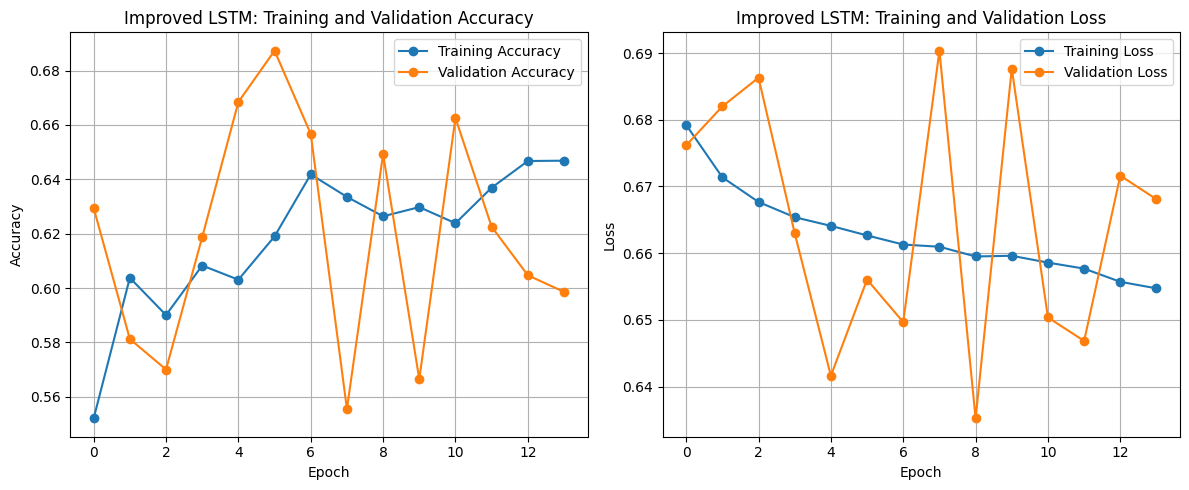

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

# Assume data is preprocessed (sequences, labels available)
# Split data
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    sequences, labels, test_size=0.2, random_state=42
)

# Compute class weights for imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_lstm), y=y_train_lstm)
class_weight_dict = {i: w for i, w in enumerate(class_weights)}

# Define improved LSTM model
model = Sequential([
    Input(shape=(5, 7)),
    LSTM(128, return_sequences=True),  # First LSTM layer
    Dropout(0.3),
    LSTM(64, return_sequences=False),  # Second LSTM layer
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile with tuned learning rate
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train model
history = model.fit(
    X_train_lstm, y_train_lstm,
    epochs=50,
    batch_size=128,  # Reduced batch size
    validation_split=0.2,
    callbacks=[early_stopping],
    class_weight=class_weight_dict,
    verbose=1
)

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Improved LSTM: Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Improved LSTM: Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('improved_lstm_plots.png')

Epoch 1/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5574 - loss: 0.6807 - val_accuracy: 0.5631 - val_loss: 0.6765
Epoch 2/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5742 - loss: 0.6714 - val_accuracy: 0.5641 - val_loss: 0.6745
Epoch 3/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5891 - loss: 0.6701 - val_accuracy: 0.5738 - val_loss: 0.6613
Epoch 4/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5834 - loss: 0.6657 - val_accuracy: 0.5970 - val_loss: 0.6654
Epoch 5/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5934 - loss: 0.6631 - val_accuracy: 0.5861 - val_loss: 0.6642
Epoch 6/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6043 - loss: 0.6594 - val_accuracy: 0.6123 - val_loss: 0.6502
Epoch 7/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6201 - loss: 0.6594 - val_accuracy: 0.6113 - val_loss: 0.6448
Epoch 8/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6023 - loss: 0.6641 - val_accuracy: 

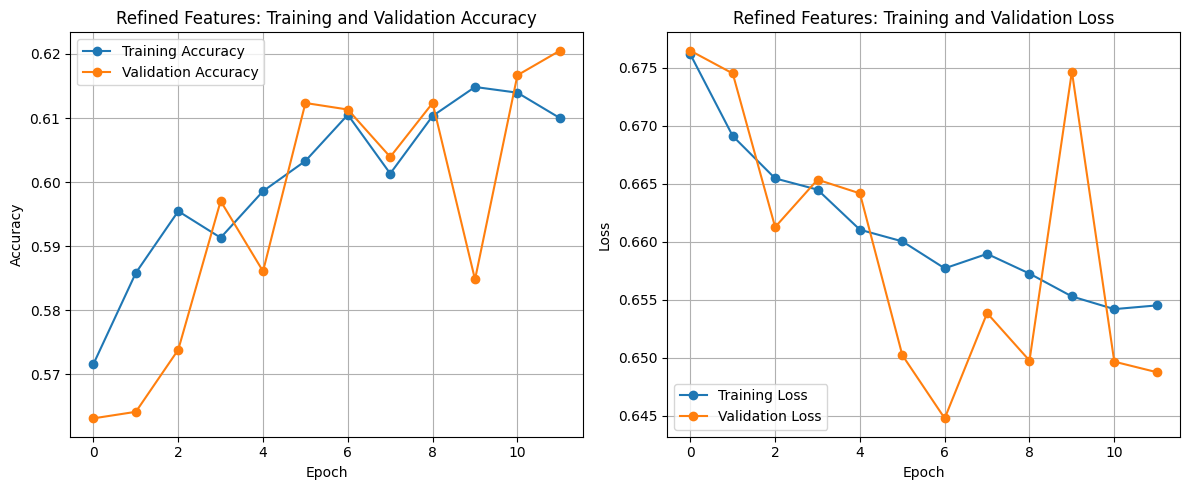

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('combined.csv')  # Replace with actual path

# Step 1: Add bowler_type feature
df['bowler_type'] = df['bowler_name'].map(bowler_styles)

# Step 2: Convert bat_right_handed to numeric
df['bat_right_handed'] = df['bat_right_handed'].map({'y': 1, 'n': 0, 'Y': 1, 'N': 0})  # Handle 'y'/'n' or 'Y'/'N'

# Step 3: Handle missing values
numerical_cols = ['landing_x', 'landing_y', 'ended_x', 'ended_y', 'ball_speed', 'ovr', 'bat_right_handed']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())  # Explicit assignment instead of inplace
df['bowler_type'] = df['bowler_type'].fillna('Unknown')

# Step 4: Categorize ovr into match phases
def categorize_over(ovr):
    if ovr <= 6:
        return 'Powerplay'
    elif ovr <= 15:
        return 'Middle'
    else:
        return 'Death'

df['match_phase'] = df['ovr'].apply(categorize_over)

# Step 5: Define deceptive deliveries with adjusted threshold
ewma_features = ['landing_x', 'landing_y', 'ended_x', 'ended_y', 'ball_speed']
alpha = 0.2
for feature in ewma_features:
    df[f'{feature}_ewma'] = df.groupby('bowler_type')[feature].transform(
        lambda x: x.ewm(alpha=alpha, adjust=False).mean()
    )
    df[f'{feature}_deviation'] = df[feature] - df[f'{feature}_ewma']
    std_dev = df.groupby('bowler_type')[f'{feature}_deviation'].transform('std')
    df[f'{feature}_is_deceptive'] = (df[f'{feature}_deviation'].abs() > 1.5 * std_dev).astype(int)
df['is_deceptive'] = df[[f'{feat}_is_deceptive' for feat in ewma_features]].max(axis=1)

# Step 6: Feature engineering
features = ['landing_x', 'landing_y', 'ended_x', 'ended_y', 'ball_speed', 'bowler_type', 'ovr', 'bat_right_handed', 'match_phase']
sequence_length = 5
sequences = []
labels = []
sequence_ids = []

# Encode categorical features
le_bowler = LabelEncoder()
le_phase = LabelEncoder()
df['bowler_type_encoded'] = le_bowler.fit_transform(df['bowler_type'])
df['match_phase_encoded'] = le_phase.fit_transform(df['match_phase'])

# Update features with encoded versions
features = ['landing_x', 'landing_y', 'ended_x', 'ended_y', 'ball_speed', 'bowler_type_encoded', 'ovr', 'bat_right_handed', 'match_phase_encoded']

# Create match_id proxy
df['match_id'] = df.groupby(['batting_team', 'bowling_team', 'inning']).ngroup()
df = df.sort_values(['match_id', 'ovr'])

# Generate sequences
for match_id in df['match_id'].unique():
    match_df = df[df['match_id'] == match_id]
    for bowler_type in match_df['bowler_type'].unique():
        bowler_df = match_df[match_df['bowler_type'] == bowler_type]
        for i in range(sequence_length, len(bowler_df)):
            seq_data = bowler_df.iloc[i-sequence_length:i][features].values
            label = bowler_df.iloc[i]['is_deceptive']
            sequences.append(seq_data)
            labels.append(label)
            sequence_ids.append(bowler_df.iloc[i]['Unnamed: 0'])

sequences = np.array(sequences, dtype=np.float32)
labels = np.array(labels, dtype=np.int32)

# Normalize numerical features
scaler = StandardScaler()
numerical_indices = [0, 1, 2, 3, 4, 6, 7]  # landing_x, landing_y, ended_x, ended_y, ball_speed, ovr, bat_right_handed
for i in numerical_indices:
    sequences[:, :, i] = scaler.fit_transform(sequences[:, :, i].reshape(-1, 1)).reshape(sequences.shape[0], sequences.shape[1])

# Split data
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    sequences, labels, test_size=0.2, random_state=42
)

# Compute class weights for imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_lstm), y=y_train_lstm)
class_weight_dict = {i: w for i, w in enumerate(class_weights)}

# Train improved LSTM
model = Sequential([
    Input(shape=(sequence_length, len(features))),
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
history = model.fit(
    X_train_lstm, y_train_lstm,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping],
    class_weight=class_weight_dict,
    verbose=1
)

# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Refined Features: Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Refined Features: Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('refined_features_plots.png')

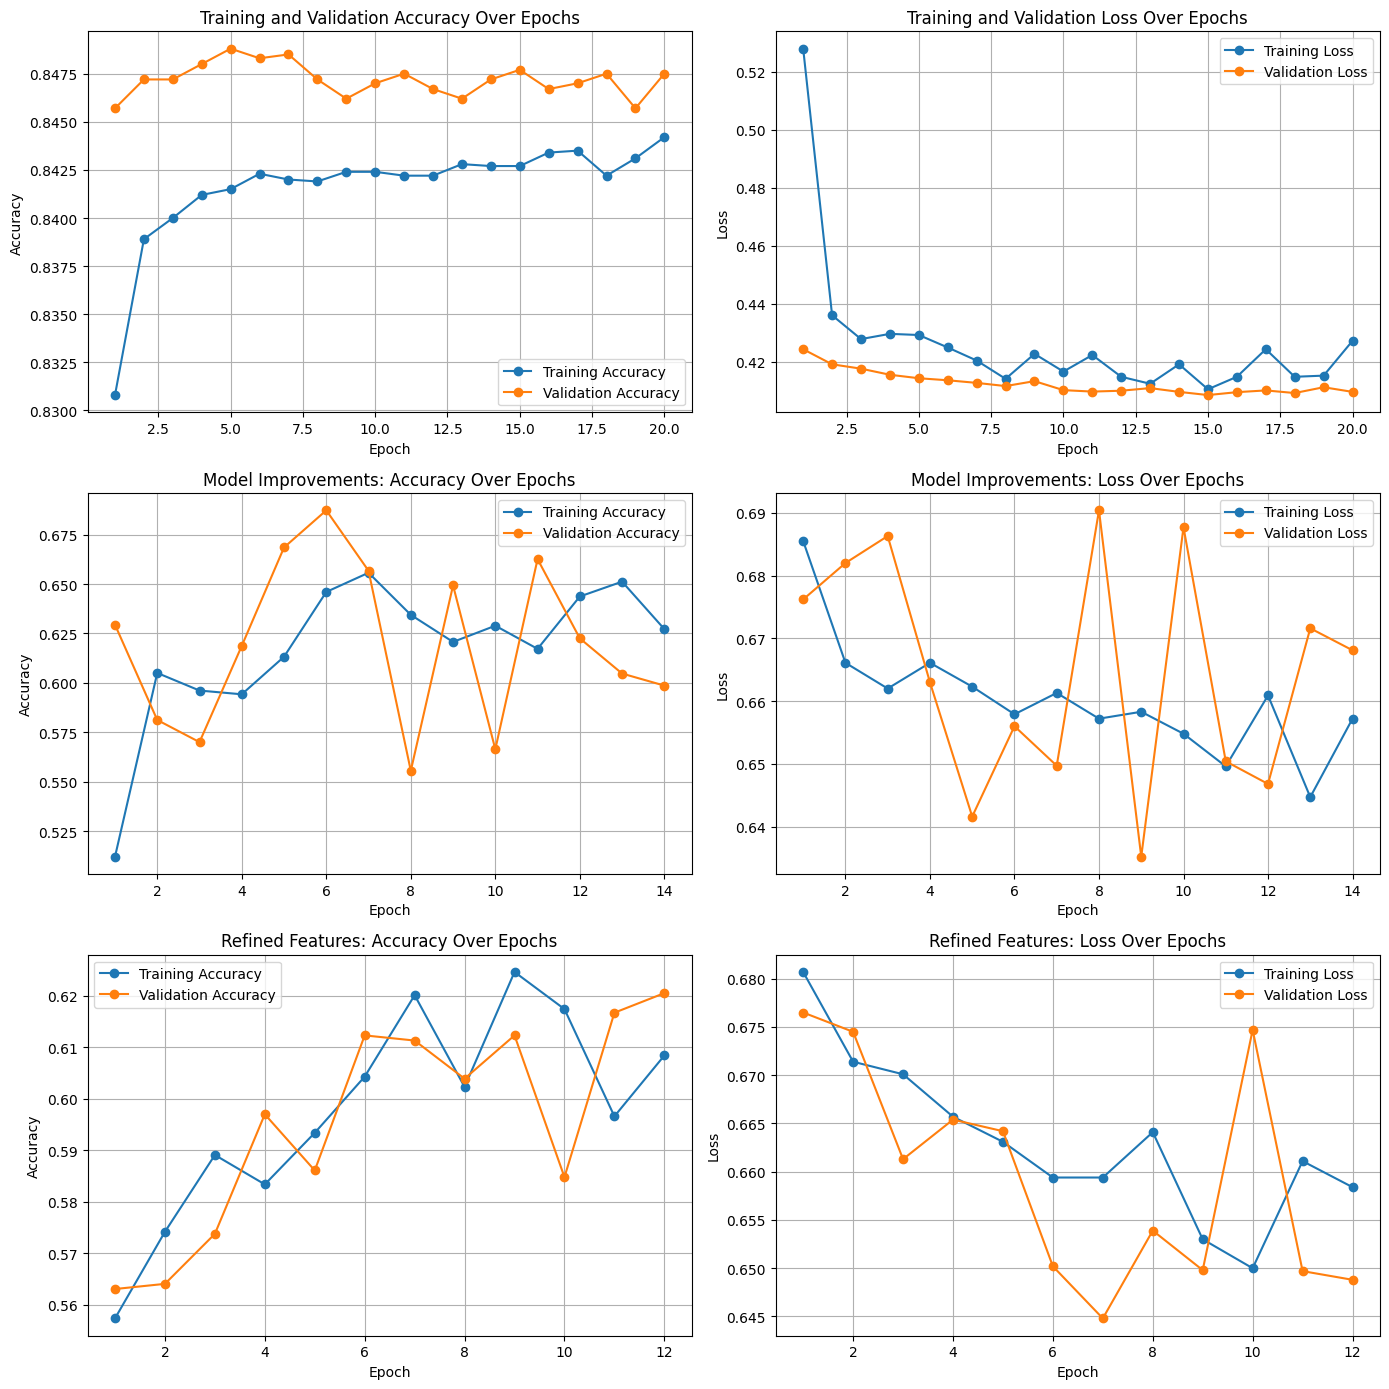

In [ ]:
import matplotlib.pyplot as plt

# Data from training history
epochs = range(1, 21)
train_accuracy = [0.8308, 0.8389, 0.8400, 0.8412, 0.8415, 0.8423, 0.8420, 0.8419, 0.8424, 0.8424,
                  0.8422, 0.8422, 0.8428, 0.8427, 0.8427, 0.8434, 0.8435, 0.8422, 0.8431, 0.8442]
val_accuracy = [0.8457, 0.8472, 0.8472, 0.8480, 0.8488, 0.8483, 0.8485, 0.8472, 0.8462, 0.8470,
                0.8475, 0.8467, 0.8462, 0.8472, 0.8477, 0.8467, 0.8470, 0.8475, 0.8457, 0.8475]
train_loss = [0.5280, 0.4361, 0.4279, 0.4297, 0.4293, 0.4250, 0.4205, 0.4142, 0.4228, 0.4167,
              0.4224, 0.4149, 0.4125, 0.4192, 0.4106, 0.4149, 0.4244, 0.4149, 0.4153, 0.4273]
val_loss = [0.4244, 0.4192, 0.4177, 0.4156, 0.4144, 0.4137, 0.4128, 0.4117, 0.4134, 0.4103,
            0.4098, 0.4101, 0.4110, 0.4097, 0.4086, 0.4096, 0.4102, 0.4093, 0.4113, 0.4097]


# Model Improvements Training History
epochs_mi = range(1, 15)  # 14 epochs
train_acc_mi = [0.5120, 0.6050, 0.5961, 0.5942, 0.6132, 0.6460, 0.6557, 0.6344, 0.6207, 0.6289, 0.6172, 0.6437, 0.6512, 0.6272]
val_acc_mi = [0.6294, 0.5812, 0.5700, 0.6187, 0.6685, 0.6873, 0.6567, 0.5555, 0.6493, 0.5664, 0.6626, 0.6225, 0.6047, 0.5986]
train_loss_mi = [0.6855, 0.6661, 0.6620, 0.6661, 0.6623, 0.6579, 0.6613, 0.6572, 0.6583, 0.6548, 0.6496, 0.6609, 0.6447, 0.6572]
val_loss_mi = [0.6762, 0.6820, 0.6863, 0.6630, 0.6416, 0.6560, 0.6497, 0.6904, 0.6352, 0.6877, 0.6504, 0.6468, 0.6716, 0.6681]

# Refined Features Training History
epochs_rf = range(1, 13)  # 12 epochs
train_acc_rf = [0.5574, 0.5742, 0.5891, 0.5834, 0.5934, 0.6043, 0.6201, 0.6023, 0.6246, 0.6174, 0.5966, 0.6084]
val_acc_rf = [0.5631, 0.5641, 0.5738, 0.5970, 0.5861, 0.6123, 0.6113, 0.6039, 0.6123, 0.5848, 0.6167, 0.6205]
train_loss_rf = [0.6807, 0.6714, 0.6701, 0.6657, 0.6631, 0.6594, 0.6594, 0.6641, 0.6530, 0.6500, 0.6611, 0.6584]
val_loss_rf = [0.6765, 0.6745, 0.6613, 0.6654, 0.6642, 0.6502, 0.6448, 0.6539, 0.6498, 0.6747, 0.6497, 0.6488]

# Plotting
plt.figure(figsize=(14, 14))

# LSTM(initial): Accuracy
plt.subplot(3, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('accuracy_plot.png')

# LSTM(initial): Loss
plt.subplot(3, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('loss_plot.png')

# Model Improvements: Accuracy
plt.subplot(3, 2, 3)
plt.plot(epochs_mi, train_acc_mi, label='Training Accuracy', marker='o')
plt.plot(epochs_mi, val_acc_mi, label='Validation Accuracy', marker='o')
plt.title('Model Improvements: Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Model Improvements: Loss
plt.subplot(3, 2, 4)
plt.plot(epochs_mi, train_loss_mi, label='Training Loss', marker='o')
plt.plot(epochs_mi, val_loss_mi, label='Validation Loss', marker='o')
plt.title('Model Improvements: Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Refined Features: Accuracy
plt.subplot(3, 2, 5)
plt.plot(epochs_rf, train_acc_rf, label='Training Accuracy', marker='o')
plt.plot(epochs_rf, val_acc_rf, label='Validation Accuracy', marker='o')
plt.title('Refined Features: Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Refined Features: Loss
plt.subplot(3, 2, 6)
plt.plot(epochs_rf, train_loss_rf, label='Training Loss', marker='o')
plt.plot(epochs_rf, val_loss_rf, label='Validation Loss', marker='o')
plt.title('Refined Features: Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('lstm_updates_plots.png')